In [1]:
import thinkstats2
import thinkplot
import nsfg
import first
import analytic
import scipy.stats
import numpy as np
import brfss
import populations
import random
import test_models
import hinc

In [2]:
df = analytic.ReadBabyBoom() #get data from file

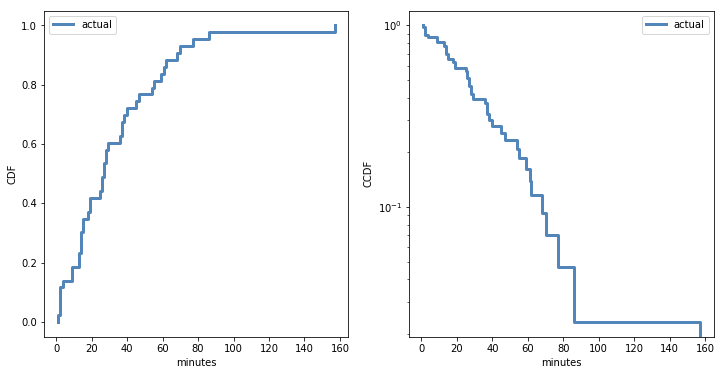

<Figure size 576x432 with 0 Axes>

In [3]:
diffs = df.minutes.diff() #add data from column diff into var diff
cdf = thinkstats2.Cdf(diffs, label='actual') #create CDF using data and store in var cdf

thinkplot.PrePlot(2, cols=2) #initiate thinkplot
thinkplot.Cdf(cdf) #plot cdf
thinkplot.Config(xlabel='minutes', ylabel='CDF') #label the graph

thinkplot.PrePlot(2) #initiate the second thinkplot
thinkplot.SubPlot(2) #assign to the subplot(2)
thinkplot.Cdf(cdf, complement=True) #plot the complement of the cdf graph
thinkplot.Show(xlabel='minutes', ylabel='CCDF', yscale='log') #label the graph, and set the yscale to log

In [4]:
scipy.stats.norm.cdf(1) #Probability at x=0 of the standard normal distribution (mu=0, sigma=1) 

0.8413447460685429

In [5]:
#testing
var1 = scipy.stats.norm.cdf(3) - scipy.stats.norm.cdf(-3)
var1

0.9973002039367398

In [6]:
#testing
var1 = scipy.stats.norm.cdf(3, 1, 2) - scipy.stats.norm.cdf(-1, 1, 2)
var1

0.6826894921370859

In [7]:
def EvalNormalCdf(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

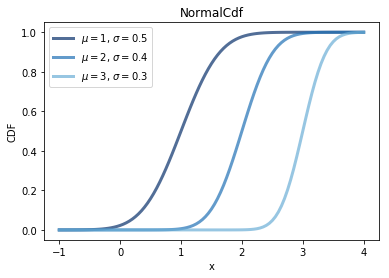

In [8]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)
    thinkplot.Config(title='NormalCdf', xlabel='x', ylabel='CDF', loc='upper left')

In [9]:
#testing
var3 = np.linspace(0, 5, 100)
var4 = set(var3) - set(thinkstats2.Trim(var3, p=0.40))
len(var4)


# Trim removes values from an array
# p specifies the fraction of values to remove from each end
# p = 0.01 means, from a array of 100 values, it will remove 1 item from each end
# that means a total of 2 values will be removed from the sample

80

In [10]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

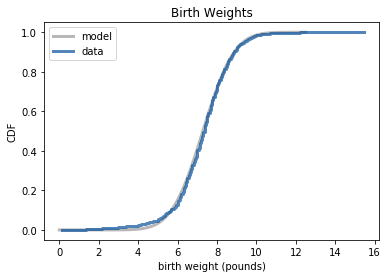

In [11]:
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01) # Trim values and find out new mean and variance of the new sample
sigma = np.sqrt(var) # find the std by square rooting the variance
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low = 0, high=12.5) # create a new set of values using new mean and std
thinkplot.Plot(xs, ps, label='model', color='0.6') #plot the graph using the new values. If x and y values are in 2 arrays
                                                    #thinkstats.Plot method is used

cdf = thinkstats2.Cdf(weights, label='data') #find the cdf of the original weights data
thinkplot.PrePlot(1) 
thinkplot.Cdf(cdf) #Plot the cdf of the original data set
thinkplot.Config(title='Birth Weights', xlabel='birth weight (pounds)', ylabel='CDF')

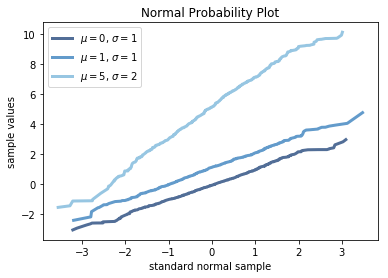

In [12]:
n = 1000
thinkplot.PrePlot(3)

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n) #print random values that agree to a normal distribution with a given mean and std
    xs, ys = thinkstats2.NormalProbability(sample)
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)
    
thinkplot.Config(title='Normal Probability Plot', xlabel='standard normal sample', ylabel='sample values')

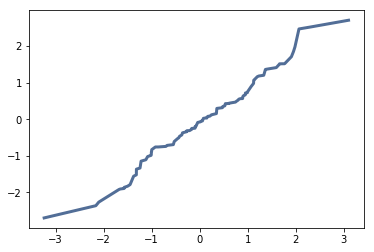

In [13]:
#testing
xs, ys = np.random.normal(0, 1, 100), np.random.normal(0, 1, 100)
xs.sort(), ys.sort()
thinkplot.Plot(xs, ys)


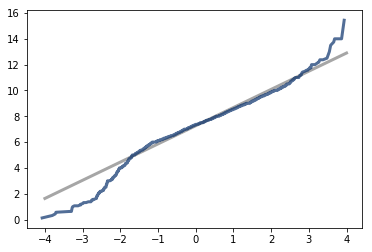

In [14]:
def MakeNormalPlot_1(weights):
    mean = weights.mean()
    std = weights.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='birth weights')

MakeNormalPlot_1(weights)

In [15]:
df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

In [16]:
def MakeNormalModel(weights):
    cdf = thinkstats2.Cdf(weights, label='weights')
    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)
    
    xmin = mean - 4 * std
    xmax = mean + 4 * std
    
    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

{'xscale': 'linear', 'yscale': 'linear'}

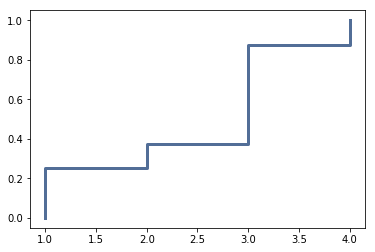

In [17]:
#testing
sam = np.linspace(1, 10, 10)
sam = [1, 1, 2, 3, 3, 3, 3,  4]
sam_cdf = thinkstats2.Cdf(sam)
sam_cdf
thinkplot.Cdf(sam_cdf)

n, mean, std 398484 78.59599565702814 17.75455519179819


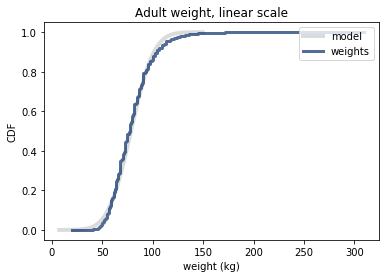

In [18]:
MakeNormalModel(weights)
thinkplot.Config(title='Adult weight, linear scale', xlabel='weight (kg)', ylabel='CDF', loc='upper right')

n, mean, std 398484 1.884660713731975 0.096235802591517


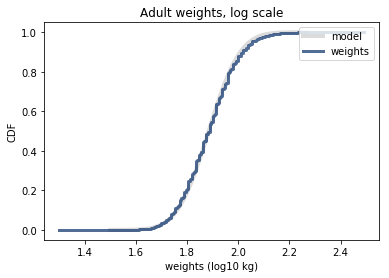

In [19]:
log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(title='Adult weights, log scale', xlabel='weights (log10 kg)', ylabel='CDF', loc='upper right')

In [20]:
def MakeNormalPlot(weights):
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)
    
    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='weights')

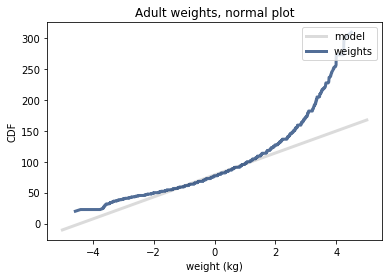

In [21]:
MakeNormalPlot(weights)
thinkplot.Config(title='Adult weights, normal plot', xlabel='weight (kg)', ylabel='CDF', loc='upper right')

In [22]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
np.sqrt(var)

17.75455519179819

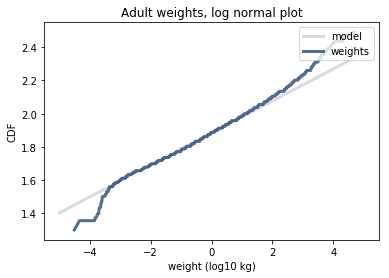

In [23]:
MakeNormalPlot(log_weights)
thinkplot.Config(title='Adult weights, log normal plot', xlabel='weight (log10 kg)', ylabel='CDF', loc='upper right')

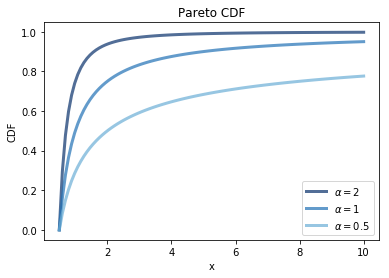

In [24]:
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100)
    thinkplot.plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x', ylabel='CDF', loc='lower right')
    


In [25]:
pops = populations.ReadData()
print('Number of cities/towns', len(pops))

Number of cities/towns 19515


In [44]:
thinkstats2.Cdf(np.log10(pops))

Cdf([0.         0.30103    0.47712125 ... 6.4337468  6.5863396  6.92099402], [5.12426339e-05 1.53727902e-04 3.07455803e-04 ... 9.99897515e-01
 9.99948757e-01 1.00000000e+00])

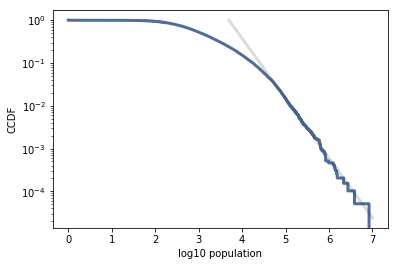

In [45]:
log_pops = np.log10(pops)
cdf = thinkstats2.Cdf(pops, label='data')
cdf_log = thinkstats2.Cdf(log_pops, label='data')

#pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True)
thinkplot.Config(xlabel='log10 population', ylabel='CCDF', yscale='log', loc='lower left')

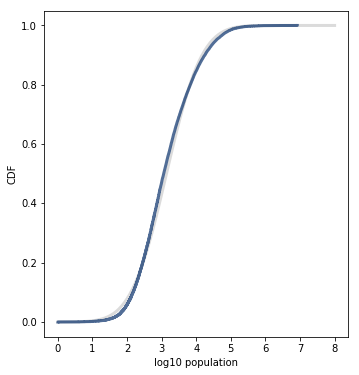

In [51]:
thinkplot.PrePlot(cols=2)
mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log)
thinkplot.Config(xlabel='log10 population', ylabel='CDF', loc='lower right')

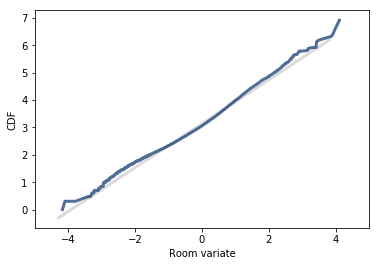

In [52]:
thinkstats2.NormalProbabilityPlot(log_pops, label='data')
thinkplot.Config(xlabel='Room variate', ylabel='CDF', xlim=[-5, 5])

In [53]:
def expovariate(lam):
    p = random.random()
    x = -np.log(1-p) / lam
    return x

In [55]:
t = [expovariate(lam=2) for _ in range(1000)]

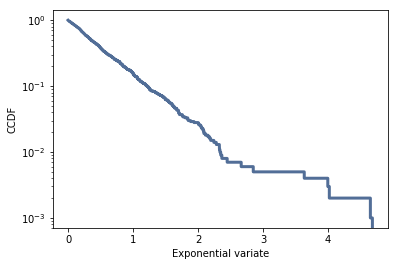

In [56]:
cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Exponential variate', ylabel='CCDF', yscale='log')

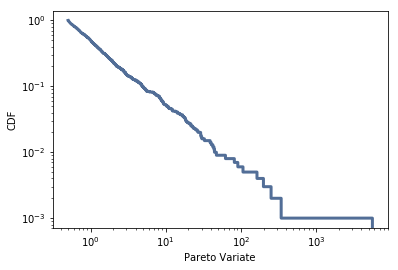

In [57]:
def paretovariate(alpha, xmin):
    y = random.random()
    x = np.exp((-np.log(y)/alpha) + np.log(xmin))
    return x

p = [paretovariate(1, 0.5) for _ in range(1000)]

cdfp = thinkstats2.Cdf(p)
thinkplot.Cdf(cdfp, complement=True)
thinkplot.Config(xlabel='Pareto Variate', ylabel='CDF', xscale='log', yscale='log')

## Exercise 5.3 

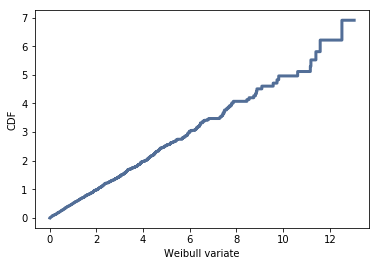

In [33]:
sample = [random.weibullvariate(2, 1) for _ in range(1000)]
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf, transform='weibull')
thinkplot.Config(xlabel='Weibull variate', ylabel='CDF')

## Exercise 5.5 

In [34]:
def ReadFile(filename):
    """Reads a list of numbers from a file.

    filename: string

    returns: list of float
    """
    fp = open(filename)
    data = []
    for line in fp:
        x = float(line.strip())
        data.append(x)
    return data


def test(filename='mystery0.dat'):
    data = ReadFile(filename)
    cdf = thinkstats2.Cdf(data)

    thinkplot.PrePlot(num=6, rows=2, cols=3)
    thinkplot.SubPlot(1)
    thinkplot.Cdf(cdf, color='C0', label=filename)
    thinkplot.Config(title='CDF on linear scale', ylabel='CDF')

    thinkplot.SubPlot(2)
    scale = thinkplot.Cdf(cdf, xscale='log', color='C0')
    thinkplot.Config(title='CDF on log-x scale', ylabel='CDF', **scale)

    thinkplot.SubPlot(3)
    scale = thinkplot.Cdf(cdf, transform='exponential', color='C0')
    thinkplot.Config(title='CCDF on log-y scale', ylabel='log CCDF', **scale)

    thinkplot.SubPlot(4)
    xs, ys = thinkstats2.NormalProbability(data)
    thinkplot.Plot(xs, ys, color='C0')
    thinkplot.Config(title='Normal probability plot',
                     xlabel='random normal', ylabel='data')

    thinkplot.SubPlot(5)
    scale = thinkplot.Cdf(cdf, transform='pareto', color='C0')
    thinkplot.Config(title='CCDF on log-log scale',  ylabel='log CCDF', **scale)

    thinkplot.SubPlot(6)
    scale = thinkplot.Cdf(cdf, transform='weibull', color='C0')
    thinkplot.Config(title='CCDF on loglog-y log-x scale',
                     ylabel='log log CCDF', **scale)

    thinkplot.Show(legend=False)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


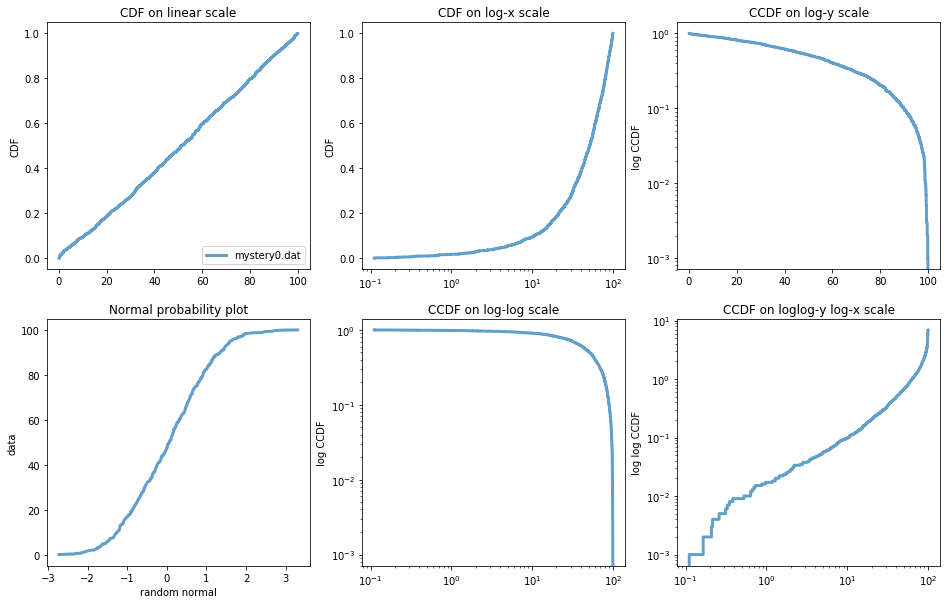

<Figure size 576x432 with 0 Axes>

In [35]:
test()

In [36]:
df = hinc.ReadData()

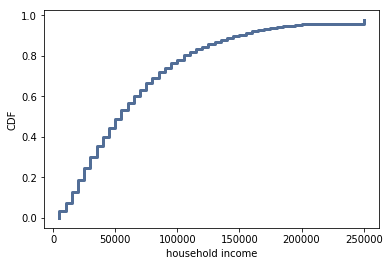

In [37]:
xs, ps = df.income.values, df.ps.values
cdf = thinkstats2.Cdf(xs, ps, label='data')
cdf_log = thinkstats2.Cdf(np.log10(xs), ps, label='data')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='household income', ylabel='CDF')

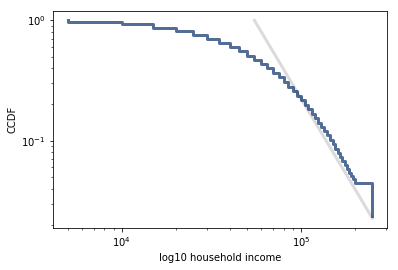

In [38]:
xs, ys = thinkstats2.RenderParetoCdf(xmin=55000, alpha=2.5, low=0, high=250000)
thinkplot.Plot(xs, 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='log10 household income', ylabel='CCDF', xscale='log', yscale='log', loc='lower left')

In [39]:
median = cdf_log.Percentile(50)
iqr = cdf_log.Percentile(75) - cdf_log.Percentile(25)
std = iqr/1.349

#std = 0.35


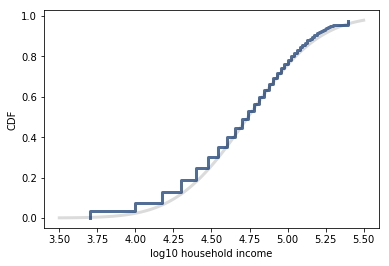

In [40]:
xs, ps = thinkstats2.RenderNormalCdf(median, std, low=3.5, high=5.5)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Plot(cdf_log)
thinkplot.Config(xlabel='log10 household income', ylabel='CDF')